# Probability Distribution Analysis

This notebook analyzes probability distributions from LLM responses using different temperature settings.
We compare OpenAI and Claude models with varying levels of prompt rewording and sampling randomness.

In [1]:
import sys
sys.path.append('..')
import os
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from probability_estimator import get_probability_distribution
import asyncio

# Check for OpenRouter API key
openrouter_available = os.environ.get("OPENROUTER_API_KEY") is not None

print(f"OpenRouter API Key available: {openrouter_available}")

OpenRouter API Key available: True


## Configuration

Set your prompt and parameters here:

In [2]:
# User-defined prompt
USER_PROMPT = "What is the probability that Kamala Harris runs for president again?"
USER_PROMPT = "How likely is it that Nasdaq hits 7000 before Christmas 2025?"

# Number of samples to collect for each configuration
N_SAMPLES = 10

# Temperature settings to test
LOW_TEMP = 0.3
HIGH_TEMP = 0.9

print(f"Prompt: {USER_PROMPT}")
print(f"Samples per configuration: {N_SAMPLES}")
print(f"Low temperature: {LOW_TEMP}")
print(f"High temperature: {HIGH_TEMP}")

Prompt: How likely is it that Nasdaq hits 7000 before Christmas 2025?
Samples per configuration: 10
Low temperature: 0.3
High temperature: 0.9


## Collect Data from OpenAI

Generate probability distributions using OpenAI with different temperature combinations:

In [3]:
async def collect_openai_data():
    """Collect OpenAI data using OpenRouter"""
    openai_results = {}

    if openrouter_available:
        print("Collecting OpenAI data via OpenRouter...\n")
        
        # Configuration 1: Low reword temp, Low prompt temp
        print("1. Low reword temp, Low prompt temp...")
        openai_results['low_low'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=LOW_TEMP,
            prompt_temperature=LOW_TEMP,
            model="openai/gpt-4o-mini"
        )
        print(f"   Mean: {np.mean(openai_results['low_low']['probabilities']):.3f}")
        
        # Configuration 2: Low reword temp, High prompt temp
        print("2. Low reword temp, High prompt temp...")
        openai_results['low_high'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=LOW_TEMP,
            prompt_temperature=HIGH_TEMP,
            model="openai/gpt-4o-mini"
        )
        print(f"   Mean: {np.mean(openai_results['low_high']['probabilities']):.3f}")
        
        # Configuration 3: High reword temp, Low prompt temp
        print("3. High reword temp, Low prompt temp...")
        openai_results['high_low'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=HIGH_TEMP,
            prompt_temperature=LOW_TEMP,
            model="openai/gpt-4o-mini"
        )
        print(f"   Mean: {np.mean(openai_results['high_low']['probabilities']):.3f}")
        
        # Configuration 4: High reword temp, High prompt temp
        print("4. High reword temp, High prompt temp...")
        openai_results['high_high'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=HIGH_TEMP,
            prompt_temperature=HIGH_TEMP,
            model="openai/gpt-4o-mini"
        )
        print(f"   Mean: {np.mean(openai_results['high_high']['probabilities']):.3f}")
        
        print("\nOpenAI data collection complete!")
    else:
        print("OpenRouter API key not available. Skipping OpenAI data collection.")
    
    return openai_results

# Run the async function
openai_results = await collect_openai_data()


1. Low reword temp, Low prompt temp...
   Mean: 0.495
2. Low reword temp, High prompt temp...
   Mean: 0.475
3. High reword temp, Low prompt temp...
   Mean: 0.525
4. High reword temp, High prompt temp...
   Mean: 0.480

OpenAI data collection complete!


## Collect Data from Claude

Generate probability distributions using Claude with different temperature combinations:

In [4]:
async def collect_claude_data():
    """Collect Claude data using OpenRouter"""
    claude_results = {}

    if openrouter_available:
        print("Collecting Claude data via OpenRouter...\n")
        
        # Configuration 1: Low reword temp, Low prompt temp
        print("1. Low reword temp, Low prompt temp...")
        claude_results['low_low'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=LOW_TEMP,
            prompt_temperature=LOW_TEMP,
            model="anthropic/claude-sonnet-4"
        )
        print(f"   Mean: {np.mean(claude_results['low_low']['probabilities']):.3f}")
        
        # Configuration 2: Low reword temp, High prompt temp
        print("2. Low reword temp, High prompt temp...")
        claude_results['low_high'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=LOW_TEMP,
            prompt_temperature=HIGH_TEMP,
            model="anthropic/claude-sonnet-4"
        )
        print(f"   Mean: {np.mean(claude_results['low_high']['probabilities']):.3f}")
        
        # Configuration 3: High reword temp, Low prompt temp
        print("3. High reword temp, Low prompt temp...")
        claude_results['high_low'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=HIGH_TEMP,
            prompt_temperature=LOW_TEMP,
            model="anthropic/claude-sonnet-4"
        )
        print(f"   Mean: {np.mean(claude_results['high_low']['probabilities']):.3f}")
        
        # Configuration 4: High reword temp, High prompt temp
        print("4. High reword temp, High prompt temp...")
        claude_results['high_high'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=HIGH_TEMP,
            prompt_temperature=HIGH_TEMP,
            model="anthropic/claude-sonnet-4"
        )
        print(f"   Mean: {np.mean(claude_results['high_high']['probabilities']):.3f}")
        
        print("\nClaude data collection complete!")
    else:
        print("OpenRouter API key not available. Skipping Claude data collection.")
    
    return claude_results

# Run the async function
claude_results = await collect_claude_data()


1. Low reword temp, Low prompt temp...
   Mean: 0.633
2. Low reword temp, High prompt temp...
   Mean: 0.555
3. High reword temp, Low prompt temp...
   Mean: 0.630
4. High reword temp, High prompt temp...
   Mean: 0.630

Claude data collection complete!


## Visualize OpenAI Results

Create histograms showing the distribution of probabilities for each temperature configuration:

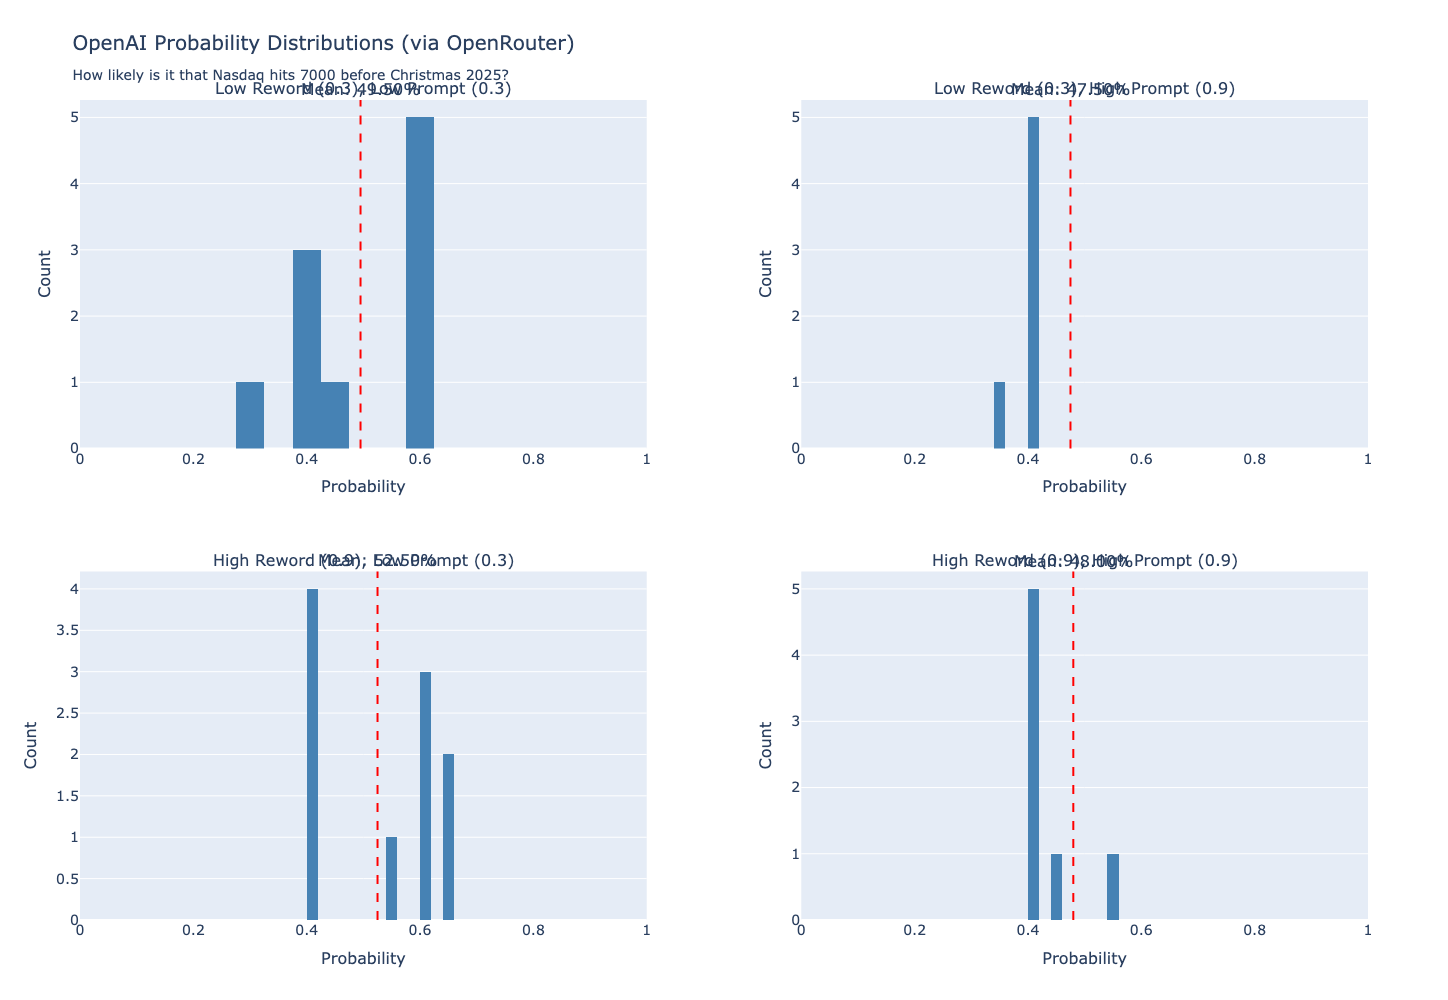

In [5]:
if openrouter_available and openai_results:
    # Create subplots: 2x2 grid with larger size and better spacing
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            f'Low Reword ({LOW_TEMP}), Low Prompt ({LOW_TEMP})',
            f'Low Reword ({LOW_TEMP}), High Prompt ({HIGH_TEMP})',
            f'High Reword ({HIGH_TEMP}), Low Prompt ({LOW_TEMP})',
            f'High Reword ({HIGH_TEMP}), High Prompt ({HIGH_TEMP})'
        ),
        vertical_spacing=0.15,
        horizontal_spacing=0.12
    )
    
    configs = [
        ('low_low', 1, 1),
        ('low_high', 1, 2),
        ('high_low', 2, 1),
        ('high_high', 2, 2)
    ]
    
    for config_name, row, col in configs:
        probs = openai_results[config_name]['probabilities']
        
        fig.add_trace(
            go.Histogram(
                x=probs,
                nbinsx=15,
                name=config_name,
                marker_color='steelblue',
                showlegend=False,
                hovertemplate='Probability: %{x:.2%}<br>Count: %{y}<extra></extra>'
            ),
            row=row, col=col
        )
        
        # Add mean line
        mean_val = np.mean(probs)
        fig.add_vline(
            x=mean_val,
            line_dash="dash",
            line_color="red",
            annotation_text=f"Mean: {mean_val:.2%}",
            annotation_position="top",
            annotation_font_size=14,
            row=row, col=col
        )
    
    # Update axes with larger fonts
    fig.update_xaxes(title_text="Probability", range=[0, 1], title_font_size=16, tickfont_size=14)
    fig.update_yaxes(title_text="Count", title_font_size=16, tickfont_size=14)
    
    # Update layout with larger figure and fonts
    fig.update_layout(
        title_text=f"OpenAI Probability Distributions (via OpenRouter)<br><sub>{USER_PROMPT}</sub>",
        title_font_size=20,
        height=1000,  # Increased from 700
        width=1400,   # Added width
        showlegend=False,
        font=dict(size=14)
    )
    
    # Update subplot titles font size
    for annotation in fig['layout']['annotations']:
        annotation['font'] = dict(size=16)
    
    fig.show()
else:
    print("No OpenAI data to visualize.")

## Visualize Claude Results

Create histograms showing the distribution of probabilities for each temperature configuration:

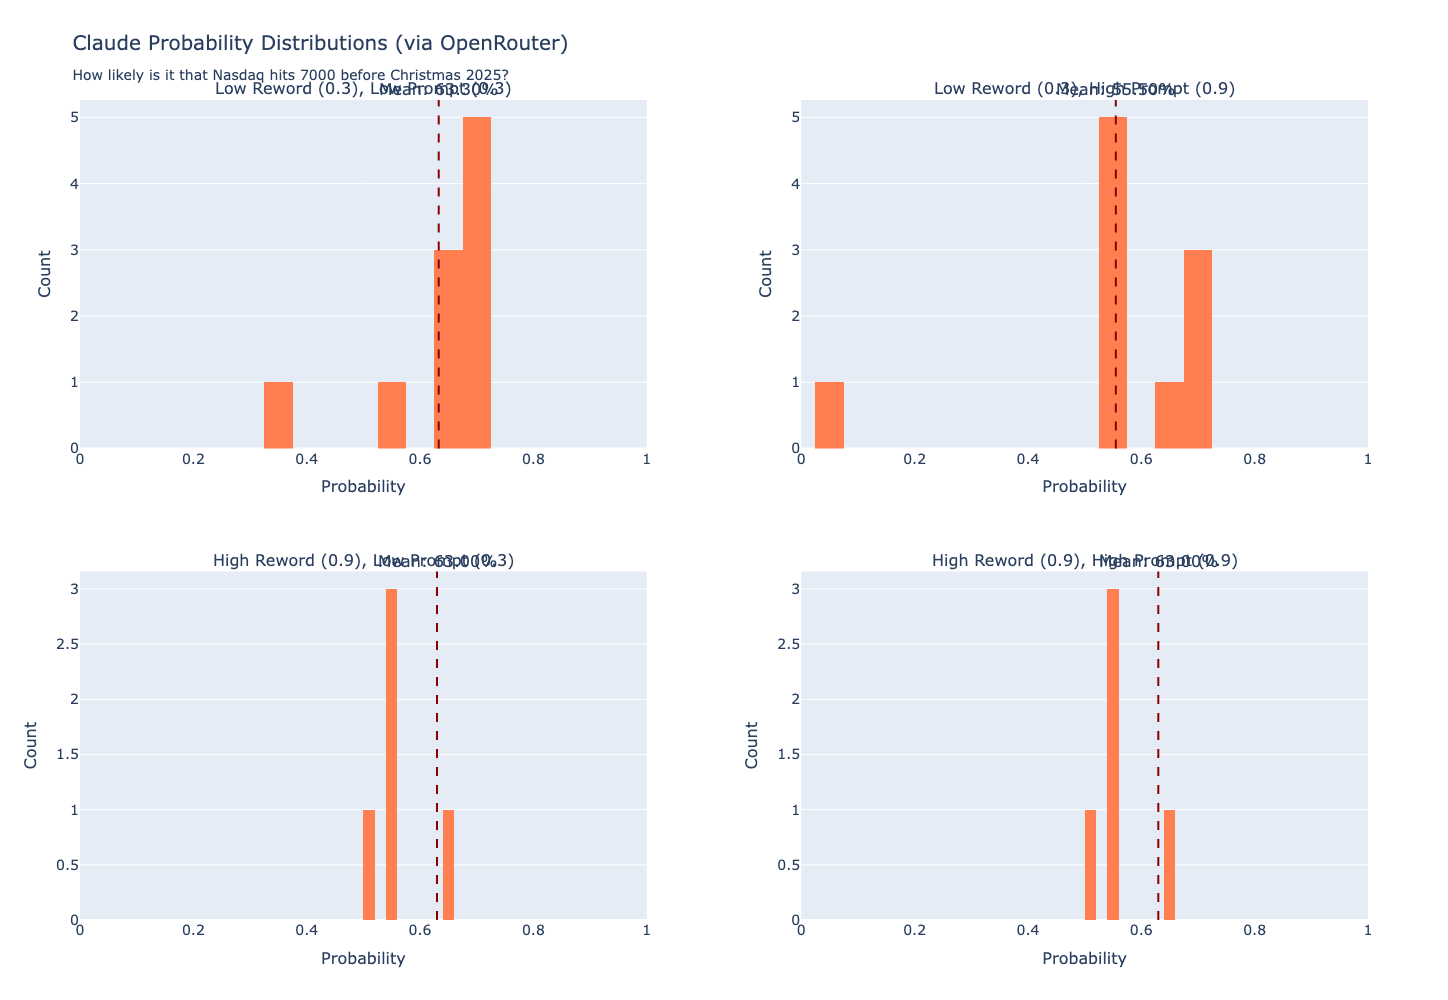

In [6]:
if openrouter_available and claude_results:
    # Create subplots: 2x2 grid with larger size and better spacing
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            f'Low Reword ({LOW_TEMP}), Low Prompt ({LOW_TEMP})',
            f'Low Reword ({LOW_TEMP}), High Prompt ({HIGH_TEMP})',
            f'High Reword ({HIGH_TEMP}), Low Prompt ({LOW_TEMP})',
            f'High Reword ({HIGH_TEMP}), High Prompt ({HIGH_TEMP})'
        ),
        vertical_spacing=0.15,
        horizontal_spacing=0.12
    )
    
    configs = [
        ('low_low', 1, 1),
        ('low_high', 1, 2),
        ('high_low', 2, 1),
        ('high_high', 2, 2)
    ]
    
    for config_name, row, col in configs:
        probs = claude_results[config_name]['probabilities']
        
        fig.add_trace(
            go.Histogram(
                x=probs,
                nbinsx=15,
                name=config_name,
                marker_color='coral',
                showlegend=False,
                hovertemplate='Probability: %{x:.2%}<br>Count: %{y}<extra></extra>'
            ),
            row=row, col=col
        )
        
        # Add mean line
        mean_val = np.mean(probs)
        fig.add_vline(
            x=mean_val,
            line_dash="dash",
            line_color="darkred",
            annotation_text=f"Mean: {mean_val:.2%}",
            annotation_position="top",
            annotation_font_size=14,
            row=row, col=col
        )
    
    # Update axes with larger fonts
    fig.update_xaxes(title_text="Probability", range=[0, 1], title_font_size=16, tickfont_size=14)
    fig.update_yaxes(title_text="Count", title_font_size=16, tickfont_size=14)
    
    # Update layout with larger figure and fonts
    fig.update_layout(
        title_text=f"Claude Probability Distributions (via OpenRouter)<br><sub>{USER_PROMPT}</sub>",
        title_font_size=20,
        height=1000,  # Increased from 700
        width=1400,   # Added width
        showlegend=False,
        font=dict(size=14)
    )
    
    # Update subplot titles font size
    for annotation in fig['layout']['annotations']:
        annotation['font'] = dict(size=16)
    
    fig.show()
else:
    print("No Claude data to visualize.")

## Statistical Summary

Compare the statistics across all configurations:

In [7]:
import pandas as pd

summary_data = []

# OpenAI summaries
if openrouter_available and openai_results:
    for config_name, result in openai_results.items():
        probs = np.array(result['probabilities'])
        summary_data.append({
            'Provider': 'OpenAI (via OpenRouter)',
            'Model': result['model'],
            'Configuration': config_name.replace('_', ' ').title(),
            'Reword Temp': result['reword_temperature'],
            'Prompt Temp': result['prompt_temperature'],
            'Mean': f"{probs.mean():.3f}",
            'Std Dev': f"{probs.std():.3f}",
            'Min': f"{probs.min():.3f}",
            'Max': f"{probs.max():.3f}",
            'Median': f"{np.median(probs):.3f}"
        })

# Claude summaries
if openrouter_available and claude_results:
    for config_name, result in claude_results.items():
        probs = np.array(result['probabilities'])
        summary_data.append({
            'Provider': 'Claude (via OpenRouter)',
            'Model': result['model'],
            'Configuration': config_name.replace('_', ' ').title(),
            'Reword Temp': result['reword_temperature'],
            'Prompt Temp': result['prompt_temperature'],
            'Mean': f"{probs.mean():.3f}",
            'Std Dev': f"{probs.std():.3f}",
            'Min': f"{probs.min():.3f}",
            'Max': f"{probs.max():.3f}",
            'Median': f"{np.median(probs):.3f}"
        })

if summary_data:
    df = pd.DataFrame(summary_data)
    print(f"\nStatistical Summary for: {USER_PROMPT}")
    print("="*100)
    print(df.to_string(index=False))
else:
    print("No data available for summary.")


Statistical Summary for: How likely is it that Nasdaq hits 7000 before Christmas 2025?
               Provider                     Model Configuration  Reword Temp  Prompt Temp  Mean Std Dev   Min   Max Median
OpenAI (via OpenRouter)        openai/gpt-4o-mini       Low Low          0.3          0.3 0.495   0.111 0.300 0.600  0.525
OpenAI (via OpenRouter)        openai/gpt-4o-mini      Low High          0.3          0.9 0.475   0.103 0.350 0.600  0.400
OpenAI (via OpenRouter)        openai/gpt-4o-mini      High Low          0.9          0.3 0.525   0.105 0.400 0.650  0.575
OpenAI (via OpenRouter)        openai/gpt-4o-mini     High High          0.9          0.9 0.480   0.090 0.400 0.600  0.425
Claude (via OpenRouter) anthropic/claude-sonnet-4       Low Low          0.3          0.3 0.633   0.105 0.350 0.700  0.675
Claude (via OpenRouter) anthropic/claude-sonnet-4      Low High          0.3          0.9 0.555   0.181 0.050 0.700  0.550
Claude (via OpenRouter) anthropic/claude-sonnet-4  

## View Sample Reworded Prompts

Examine how the prompts were reworded at different temperatures:

In [8]:
def show_reworded_prompts(results_dict, provider_name):
    print(f"\n{'='*80}")
    print(f"{provider_name} - Sample Reworded Prompts")
    print(f"{'='*80}\n")
    
    for config_name, result in results_dict.items():
        print(f"Configuration: {config_name.replace('_', ' ').title()}")
        print(f"Reword Temp: {result['reword_temperature']}, Prompt Temp: {result['prompt_temperature']}")
        print(f"{'-'*80}")
        
        # Show first 3 reworded prompts
        for i, prompt in enumerate(result['reworded_prompts'][:3], 1):
            prob = result['probabilities'][i-1]
            print(f"{i}. {prompt}")
            print(f"   → Probability: {prob:.2%}")
        print()

if openai_results:
    show_reworded_prompts(openai_results, "OpenAI")

if claude_results:
    show_reworded_prompts(claude_results, "Claude")


OpenAI - Sample Reworded Prompts

Configuration: Low Low
Reword Temp: 0.3, Prompt Temp: 0.3
--------------------------------------------------------------------------------
1. How likely is it that Nasdaq hits 7000 before Christmas 2025?
   → Probability: 60.00%
2. What are the odds that the Nasdaq will reach 7000 by Christmas 2025?
   → Probability: 30.00%
3. What are the chances that the Nasdaq reaches 7000 before Christmas 2025?
   → Probability: 60.00%

Configuration: Low High
Reword Temp: 0.3, Prompt Temp: 0.9
--------------------------------------------------------------------------------
1. How likely is it that Nasdaq hits 7000 before Christmas 2025?
   → Probability: 60.00%
2. What are the odds that the Nasdaq will reach 7000 by Christmas 2025?
   → Probability: 60.00%
3. What are the chances that the Nasdaq will reach 7000 before Christmas 2025?
   → Probability: 40.00%

Configuration: High Low
Reword Temp: 0.9, Prompt Temp: 0.3
----------------------------------------------

## Side-by-Side Comparison

Compare OpenAI and Claude directly for the same configuration:

In [9]:
if openrouter_available and openai_results and claude_results:
    # Create comparison plot for all 4 configurations with larger size
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            f'Low Reword ({LOW_TEMP}), Low Prompt ({LOW_TEMP})',
            f'Low Reword ({LOW_TEMP}), High Prompt ({HIGH_TEMP})',
            f'High Reword ({HIGH_TEMP}), Low Prompt ({LOW_TEMP})',
            f'High Reword ({HIGH_TEMP}), High Prompt ({HIGH_TEMP})'
        ),
        vertical_spacing=0.15,
        horizontal_spacing=0.12
    )
    
    configs = [
        ('low_low', 1, 1),
        ('low_high', 1, 2),
        ('high_low', 2, 1),
        ('high_high', 2, 2)
    ]
    
    for config_name, row, col in configs:
        # OpenAI
        fig.add_trace(
            go.Histogram(
                x=openai_results[config_name]['probabilities'],
                nbinsx=15,
                name='OpenAI',
                marker_color='steelblue',
                opacity=0.6,
                showlegend=(row==1 and col==1),
                legendgroup='openai',
                hovertemplate='OpenAI<br>Probability: %{x:.2%}<br>Count: %{y}<extra></extra>'
            ),
            row=row, col=col
        )
        
        # Claude
        fig.add_trace(
            go.Histogram(
                x=claude_results[config_name]['probabilities'],
                nbinsx=15,
                name='Claude',
                marker_color='coral',
                opacity=0.6,
                showlegend=(row==1 and col==1),
                legendgroup='claude',
                hovertemplate='Claude<br>Probability: %{x:.2%}<br>Count: %{y}<extra></extra>'
            ),
            row=row, col=col
        )
    
    # Update axes with larger fonts
    fig.update_xaxes(title_text="Probability", range=[0, 1], title_font_size=16, tickfont_size=14)
    fig.update_yaxes(title_text="Count", title_font_size=16, tickfont_size=14)
    
    # Update layout with larger figure and fonts
    fig.update_layout(
        title_text=f"OpenAI vs Claude Comparison (via OpenRouter)<br><sub>{USER_PROMPT}</sub>",
        title_font_size=20,
        height=1000,  # Increased from 700
        width=1400,   # Added width
        barmode='overlay',
        font=dict(size=14),
        legend=dict(
            font=dict(size=16),
            x=0.02,
            y=0.98,
            bgcolor='rgba(255,255,255,0.8)',
            bordercolor='black',
            borderwidth=1
        )
    )
    
    # Update subplot titles font size
    for annotation in fig['layout']['annotations']:
        annotation['font'] = dict(size=16)
    
    fig.show()
else:
    print("Both OpenAI and Claude data required for comparison.")

## Analysis Insights

Key observations:

1. **Reword Temperature**: Controls how much the prompt is varied
   - Low (0.3): Minimal rewording, similar phrasing
   - High (0.9): Significant rewording, diverse phrasing

2. **Prompt Temperature**: Controls randomness in LLM responses
   - Low (0.3): More deterministic, tighter distribution
   - High (0.9): More random, wider distribution

3. **Expected Patterns**:
   - Low/Low: Narrow distribution (consistent prompt + deterministic responses)
   - High/High: Wide distribution (varied prompts + random responses)
   - Low/High or High/Low: Medium spread

### Key Insights from Probability Evolution

**What This Shows:**

1. **Forecast Improvement**: The model's forecasts generally improved as more information became available (knowledge cutoff dates closer to the election).

2. **Uncertainty Over Time**: The error bars (±1 standard deviation) show the range of estimates. Narrower bars indicate more consistent forecasts.

3. **Calibration Analysis**: By comparing forecasts to the actual outcome (Trump won = 100%), we can measure forecast accuracy at different time horizons.

4. **Information Shocks**: Large changes between consecutive months may indicate major news events that shifted predictions.

**Interactive Features:**
- Use the slider above to explore the distribution at each time point
- Hover over the timeline plot to see exact values
- Compare early forecasts (January) vs late forecasts (November) to see how much the model improved

**Technical Notes:**
- Model: OpenAI GPT-4o-mini via OpenRouter
- Samples per time point: 10
- Knowledge cutoff dates: Model was restricted to information available up to each specific date
- This simulates how forecasts would have looked if made at different points in 2024

In [11]:
from datetime import datetime
from probability_estimator import get_probability_distribution_over_time

# Collect probability distributions over time for Trump 2024 election
print("Collecting probability distributions over time...")
print("This will take several minutes (12 time points × 10 samples each)")
print()

evolution_prompt = "Will Donald Trump win the 2024 US Presidential election?"

evolution_results = await get_probability_distribution_over_time(
    prompt=evolution_prompt,
    start_date=datetime(2024, 1, 1),
    end_date=datetime(2024, 11, 5),  # Election day
    frequency_days=30,  # Monthly
    n_samples=10,
    model="openai/gpt-4o-mini"
)

print(f"\nCollected data for {len(evolution_results)} time points")
print("Ready for visualization!")

This will take several minutes (12 time points × 10 samples each)

Querying probability distributions over time:
  Start: 2024-01-01
  End: 2024-11-05
  Frequency: 30 days
  Total queries: 12

[1/12] Querying with knowledge cutoff: January 01, 2024
  Mean probability: 0.425 (±0.025)

[2/12] Querying with knowledge cutoff: January 31, 2024
  Mean probability: 0.415 (±0.023)

[3/12] Querying with knowledge cutoff: March 01, 2024
  Mean probability: 0.430 (±0.024)

[4/12] Querying with knowledge cutoff: March 31, 2024
  Mean probability: 0.425 (±0.025)

[5/12] Querying with knowledge cutoff: April 30, 2024
  Mean probability: 0.425 (±0.025)

[6/12] Querying with knowledge cutoff: May 30, 2024
  Mean probability: 0.405 (±0.035)

[7/12] Querying with knowledge cutoff: June 29, 2024
  Mean probability: 0.425 (±0.025)

[8/12] Querying with knowledge cutoff: July 29, 2024
  Mean probability: 0.430 (±0.024)

[9/12] Querying with knowledge cutoff: August 28, 2024
  Mean probability: 0.420 (±0.02

## Probability Evolution Over Time - Interactive Visualization

This section tracks how the probability estimate for "Will Donald Trump win the 2024 presidential election?" evolved over time with different knowledge cutoff dates. Use the slider to see how the distribution changed from January 2024 to Election Day.

### Summary: Forecast Evolution Timeline

This plot shows how the mean probability estimate evolved over time, with error bars showing the standard deviation at each time point.

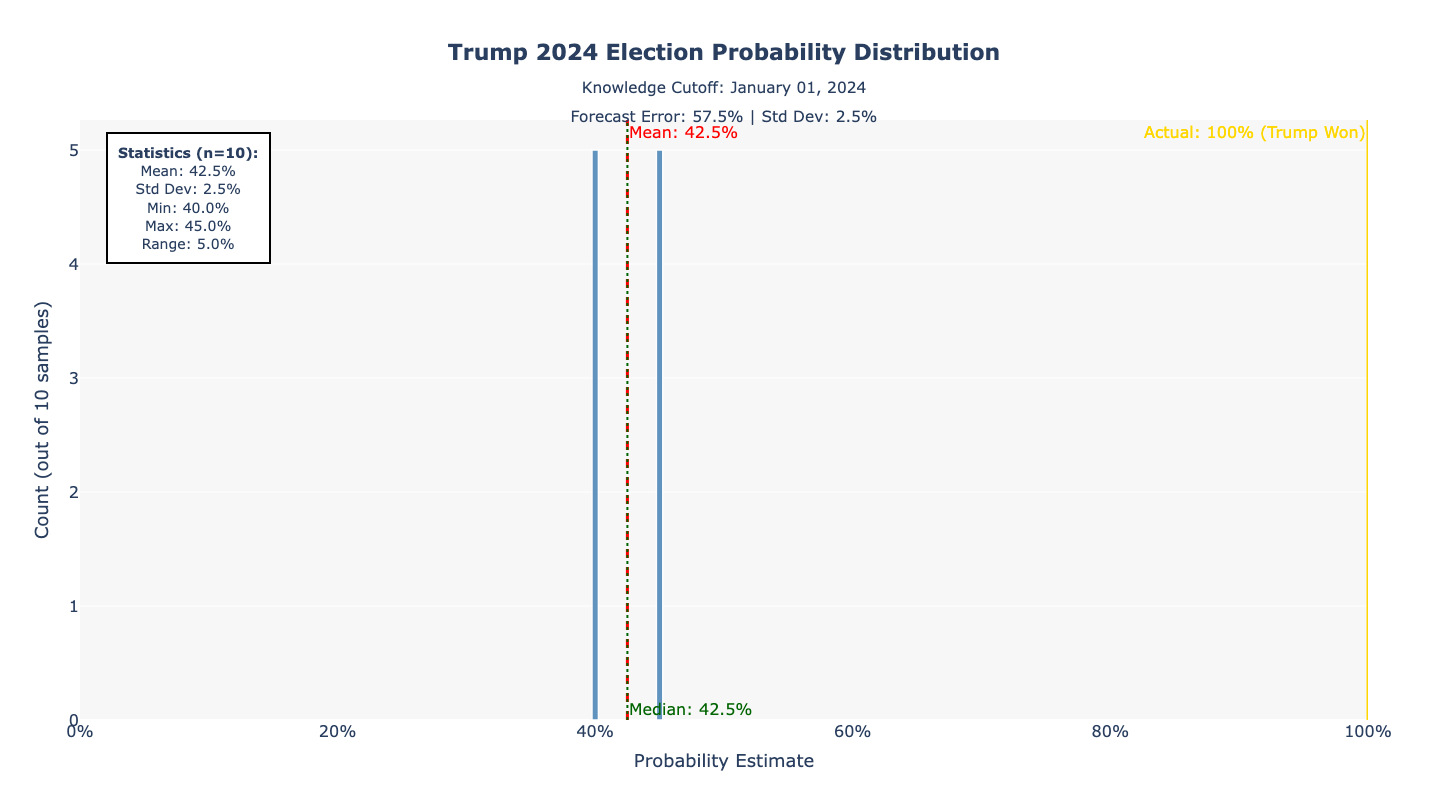

interactive(children=(IntSlider(value=0, continuous_update=False, description='Date:', layout=Layout(width='80…


Date range: January 01, 2024 to November 05, 2024
Total time points: 12


In [14]:
from ipywidgets import interact, IntSlider
import plotly.graph_objects as go

# Prepare data for visualization
sorted_dates = sorted(evolution_results.keys())
date_objects = [datetime.strptime(d, '%Y-%m-%d') for d in sorted_dates]

def create_evolution_plot(date_index):
    """Create histogram for a specific date index with detailed statistics."""
    date_str = sorted_dates[date_index]
    date_obj = date_objects[date_index]
    dist = evolution_results[date_str]
    
    probs = np.array(dist['probabilities'])
    mean_val = probs.mean()
    std_val = probs.std()
    median_val = np.median(probs)
    
    # Create histogram
    fig = go.Figure()
    
    # Add histogram
    fig.add_trace(go.Histogram(
        x=probs,
        nbinsx=20,
        marker_color='steelblue',
        marker_line_color='white',
        marker_line_width=1.5,
        opacity=0.85,
        hovertemplate='Probability: %{x:.2%}<br>Count: %{y}<extra></extra>',
        name='Distribution'
    ))
    
    # Add mean line
    fig.add_vline(
        x=mean_val,
        line_dash="dash",
        line_color="red",
        line_width=3,
        annotation_text=f"Mean: {mean_val:.1%}",
        annotation_position="top right",
        annotation_font_size=16,
        annotation_font_color="red"
    )
    
    # Add median line
    fig.add_vline(
        x=median_val,
        line_dash="dot",
        line_color="darkgreen",
        line_width=2,
        annotation_text=f"Median: {median_val:.1%}",
        annotation_position="bottom right",
        annotation_font_size=16,
        annotation_font_color="darkgreen"
    )
    
    # Add actual outcome line (Trump won = 1.0)
    fig.add_vline(
        x=1.0,
        line_dash="solid",
        line_color="gold",
        line_width=3,
        annotation_text="Actual: 100% (Trump Won)",
        annotation_position="top left",
        annotation_font_size=16,
        annotation_font_color="gold"
    )
    
    # Calculate forecast error
    forecast_error = abs(mean_val - 1.0)
    
    # Update layout
    fig.update_layout(
        title=dict(
            text=f"<b>Trump 2024 Election Probability Distribution</b><br>" +
                 f"<sub>Knowledge Cutoff: {dist['knowledge_cutoff_date']}</sub><br>" +
                 f"<sub>Forecast Error: {forecast_error:.1%} | Std Dev: {std_val:.1%}</sub>",
            font=dict(size=22),
            x=0.5,
            xanchor='center'
        ),
        xaxis=dict(
            title="Probability Estimate",
            title_font_size=18,
            tickfont_size=16,
            range=[0, 1],
            tickformat='.0%'
        ),
        yaxis=dict(
            title="Count (out of 10 samples)",
            title_font_size=18,
            tickfont_size=16
        ),
        height=800,
        width=1400,
        showlegend=False,
        font=dict(size=16),
        plot_bgcolor='rgba(240,240,240,0.5)',
        margin=dict(t=120, b=80, l=80, r=80)
    )
    
    # Add statistics annotation
    stats_text = (
        f"<b>Statistics (n=10):</b><br>" +
        f"Mean: {mean_val:.1%}<br>" +
        f"Std Dev: {std_val:.1%}<br>" +
        f"Min: {probs.min():.1%}<br>" +
        f"Max: {probs.max():.1%}<br>" +
        f"Range: {probs.max() - probs.min():.1%}"
    )
    
    fig.add_annotation(
        text=stats_text,
        xref="paper", yref="paper",
        x=0.02, y=0.98,
        xanchor='left', yanchor='top',
        showarrow=False,
        font=dict(size=14),
        bgcolor='rgba(255,255,255,0.9)',
        bordercolor='black',
        borderwidth=2,
        borderpad=10
    )
    
    fig.show()

# Create interactive slider
date_labels = [f"{d.strftime('%B %d, %Y')}" for d in date_objects]

print("Use the slider below to explore how the probability distribution evolved over time:")
print()

interact(
    create_evolution_plot,
    date_index=IntSlider(
        min=0,
        max=len(sorted_dates)-1,
        step=1,
        value=0,
        description='Date:',
        style={'description_width': '60px'},
        layout={'width': '800px'},
        continuous_update=False
    )
)

print(f"\nDate range: {date_objects[0].strftime('%B %d, %Y')} to {date_objects[-1].strftime('%B %d, %Y')}")
print(f"Total time points: {len(sorted_dates)}")

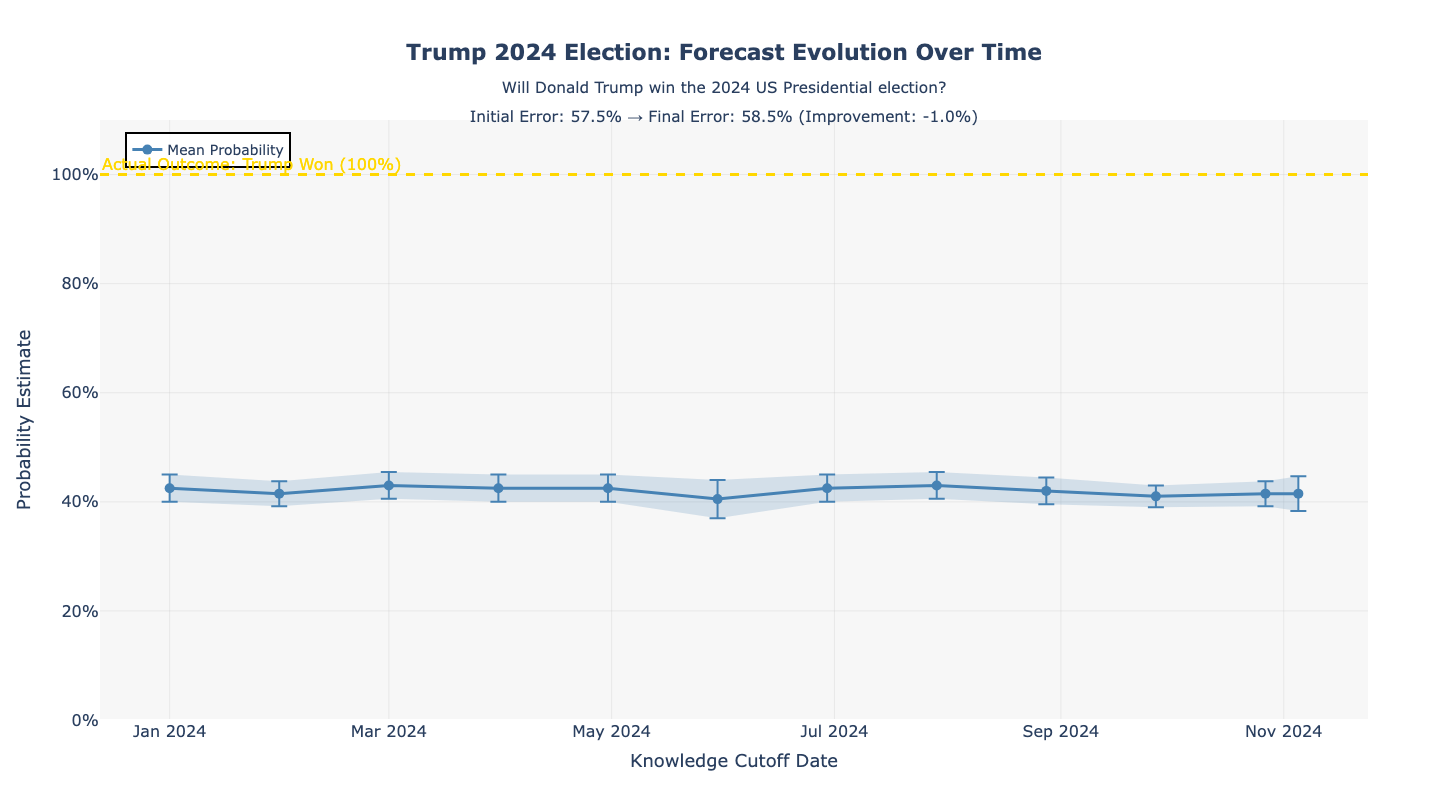


FORECAST EVOLUTION SUMMARY

Question: Will Donald Trump win the 2024 US Presidential election?
Model: openai/gpt-4o-mini
Samples per time point: 10
Time range: January 01, 2024 to November 05, 2024

Initial forecast (Jan 1, 2024): 42.5% ± 2.5%
Final forecast (Nov 5, 2024): 41.5% ± 3.2%
Actual outcome: 100% (Trump won)

Forecast error improvement: -1.0%
Final forecast was underestimated by 58.5%

Best forecast: March 01, 2024 - 43.0% (error: 57.0%)
Worst forecast: May 30, 2024 - 40.5% (error: 59.5%)



In [15]:
# Create summary timeline plot
from probability_estimator import analyze_probability_evolution

# Analyze the evolution
stats_df = await analyze_probability_evolution(evolution_results)

# Create figure
fig = go.Figure()

# Add mean line with error bars
fig.add_trace(go.Scatter(
    x=stats_df['date'],
    y=stats_df['mean'],
    mode='lines+markers',
    name='Mean Probability',
    line=dict(color='steelblue', width=3),
    marker=dict(size=10, color='steelblue', symbol='circle'),
    error_y=dict(
        type='data',
        array=stats_df['std'],
        visible=True,
        color='steelblue',
        thickness=2,
        width=8
    ),
    hovertemplate='<b>%{x|%B %d, %Y}</b><br>Mean: %{y:.1%}<extra></extra>'
))

# Add actual outcome line
fig.add_hline(
    y=1.0,
    line_dash="dash",
    line_color="gold",
    line_width=3,
    annotation_text="Actual Outcome: Trump Won (100%)",
    annotation_position="top left",
    annotation_font_size=16,
    annotation_font_color="gold"
)

# Add shaded confidence band (±1 std dev)
fig.add_trace(go.Scatter(
    x=stats_df['date'],
    y=stats_df['mean'] + stats_df['std'],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    hoverinfo='skip'
))

fig.add_trace(go.Scatter(
    x=stats_df['date'],
    y=stats_df['mean'] - stats_df['std'],
    mode='lines',
    line=dict(width=0),
    fillcolor='rgba(70, 130, 180, 0.2)',
    fill='tonexty',
    showlegend=False,
    hoverinfo='skip',
    name='±1 Std Dev'
))

# Calculate initial and final forecast errors
initial_error = abs(stats_df.iloc[0]['mean'] - 1.0)
final_error = abs(stats_df.iloc[-1]['mean'] - 1.0)
improvement = initial_error - final_error

# Update layout
fig.update_layout(
    title=dict(
        text=f"<b>Trump 2024 Election: Forecast Evolution Over Time</b><br>" +
             f"<sub>{evolution_prompt}</sub><br>" +
             f"<sub>Initial Error: {initial_error:.1%} → Final Error: {final_error:.1%} " +
             f"(Improvement: {improvement:+.1%})</sub>",
        font=dict(size=22),
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title="Knowledge Cutoff Date",
        title_font_size=18,
        tickfont_size=16,
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(200,200,200,0.3)'
    ),
    yaxis=dict(
        title="Probability Estimate",
        title_font_size=18,
        tickfont_size=16,
        range=[0, 1.1],
        tickformat='.0%',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(200,200,200,0.3)'
    ),
    height=800,
    width=1400,
    font=dict(size=16),
    plot_bgcolor='rgba(240,240,240,0.5)',
    margin=dict(t=120, b=80, l=100, r=80),
    hovermode='x unified',
    legend=dict(
        x=0.02,
        y=0.98,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255,255,255,0.9)',
        bordercolor='black',
        borderwidth=2,
        font=dict(size=14)
    )
)

fig.show()

# Print summary statistics
print("\n" + "="*80)
print("FORECAST EVOLUTION SUMMARY")
print("="*80)
print(f"\nQuestion: {evolution_prompt}")
print(f"Model: {evolution_results[sorted_dates[0]]['model']}")
print(f"Samples per time point: {evolution_results[sorted_dates[0]]['n_samples']}")
print(f"Time range: {stats_df.iloc[0]['date'].strftime('%B %d, %Y')} to {stats_df.iloc[-1]['date'].strftime('%B %d, %Y')}")
print(f"\nInitial forecast (Jan 1, 2024): {stats_df.iloc[0]['mean']:.1%} ± {stats_df.iloc[0]['std']:.1%}")
print(f"Final forecast (Nov 5, 2024): {stats_df.iloc[-1]['mean']:.1%} ± {stats_df.iloc[-1]['std']:.1%}")
print(f"Actual outcome: 100% (Trump won)")
print(f"\nForecast error improvement: {improvement:+.1%}")
print(f"Final forecast was {'over' if stats_df.iloc[-1]['mean'] > 1.0 else 'under'}estimated by {abs(stats_df.iloc[-1]['mean'] - 1.0):.1%}")

# Find best and worst forecasts
best_idx = (stats_df['mean'] - 1.0).abs().idxmin()
worst_idx = (stats_df['mean'] - 1.0).abs().idxmax()

print(f"\nBest forecast: {stats_df.iloc[best_idx]['date'].strftime('%B %d, %Y')} - {stats_df.iloc[best_idx]['mean']:.1%} (error: {abs(stats_df.iloc[best_idx]['mean'] - 1.0):.1%})")
print(f"Worst forecast: {stats_df.iloc[worst_idx]['date'].strftime('%B %d, %Y')} - {stats_df.iloc[worst_idx]['mean']:.1%} (error: {abs(stats_df.iloc[worst_idx]['mean'] - 1.0):.1%})")

print("\n" + "="*80)